# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-30 23:51:33--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-30 23:51:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [ ]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

Label
non-biased    1596
biased         318
Name: count, dtype: int64

Proporcion de tweets 'biased' y 'non-biased':
Label
non-biased    83.38558
biased        16.61442
Name: proportion, dtype: float64
                                            Contents  longitud
0  @chumeltorres ya cabrón! sin tí se reciben las...       111
1  ¿alguien es tan amable de ir a hacerme la comp...       116
2  @jenniferduquee hahaha, si está rico, nadamas ...        68
3  @evagelcot donde lo ves!!? es mi programa favo...       115
4  como siempre mi tortilla triunfa mas que otros...        85


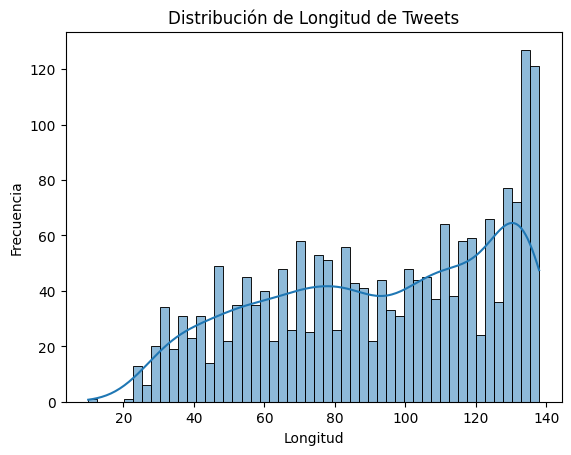

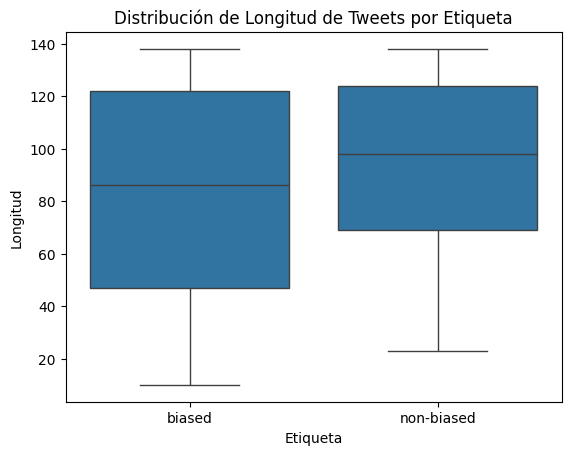

In [ ]:
tweets.info
tweets.head()
print(tweets['Label'].value_counts())
proporcion = tweets['Label'].value_counts(normalize=True) * 100
print(f"\nProporcion de tweets 'biased' y 'non-biased':\n{proporcion}")
tweets['longitud'] = tweets['Contents'].apply(len)
print(tweets[['Contents', 'longitud']].head())
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(tweets['longitud'], bins = 50, kde = True)
plt.title('Distribución de Longitud de Tweets')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()
sns.boxplot(x='Label', y='longitud', data=tweets)
plt.title('Distribución de Longitud de Tweets por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Longitud')
plt.show()

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
try:
    stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')

stop_words_es = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    if isinstance(texto, str):
        # Eliminar URLs
        texto = re.sub(r'http\S+|www\S+|https\S+', '', texto)
        # Eliminar menciones (@usuarios)
        texto = re.sub(r'@\w+', '', texto)
        # Eliminar hashtags (#palabras)
        texto = re.sub(r'#\w+', '', texto)
        # Eliminar caracteres especiales y números (conservando letras y espacios)
        texto = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', texto)
        return texto
    return ''

def eliminar_stopwords(texto):
    if isinstance(texto, str):
        palabras = texto.lower().split()
        palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words_es]
        return ' '.join(palabras_filtradas)
    return ''

tweets['texto_limpio'] = tweets['Contents'].apply(limpiar_texto)
tweets['texto_sin_stopwords'] = tweets['texto_limpio'].apply(eliminar_stopwords)

print(tweets[['Contents', 'texto_limpio', 'texto_sin_stopwords']].head())

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                        texto_limpio  \
0   ya cabrón sin tí se reciben las noticias sin ...   
1  alguien es tan amable de ir a hacerme la compr...   
2   hahaha si está rico nadamas le falta presenta...   
3   donde lo ves es mi programa favorito y sólo e...   
4  como siempre mi tortilla triunfa mas que otros...   

                                 texto_sin_stopwords  
0  cabrón tí reciben noticias colchoncito puro ch...  
1  alguien tan amable ir hacerme compra mañana ba...  
2          hahaha si rico nadamas falta presentación  
3  ves programa favorito sólo encuentro temporada...  
4                siempre tortilla triunfa mas plato

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


Palabras más comunes en tweets 'biased': [('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12), ('solo', 12), ('cosas', 10), ('niñas', 10), ('casa', 10), ('sé', 9), ('chicas', 9), ('hombres', 9), ('puta', 8), ('ahora', 8), ('mal', 8)]
Palabras más comunes en tweets 'non-biased': [('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58), ('así', 58), ('ser', 55), ('ver', 55), ('vida', 52), ('pues', 52), ('feliz', 50), ('ahora', 47), ('mal', 46), ('hacer', 46), ('solo', 43)]


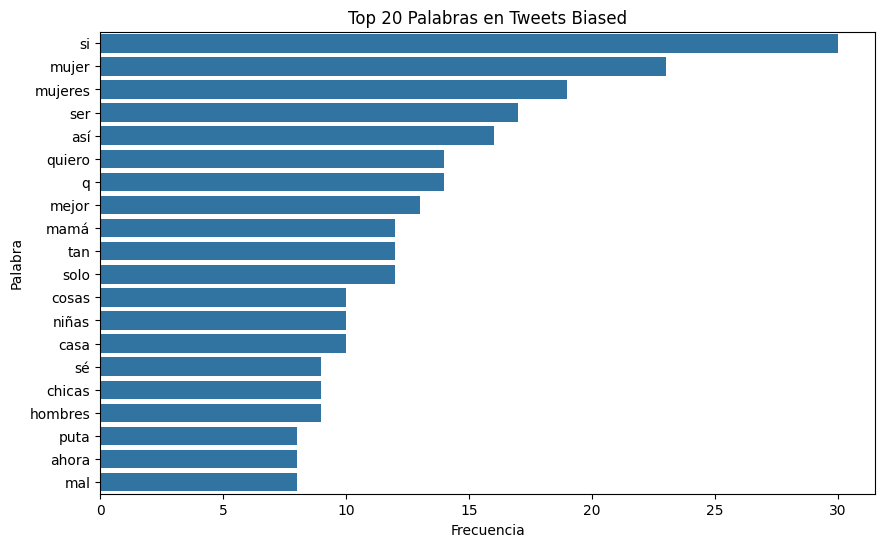

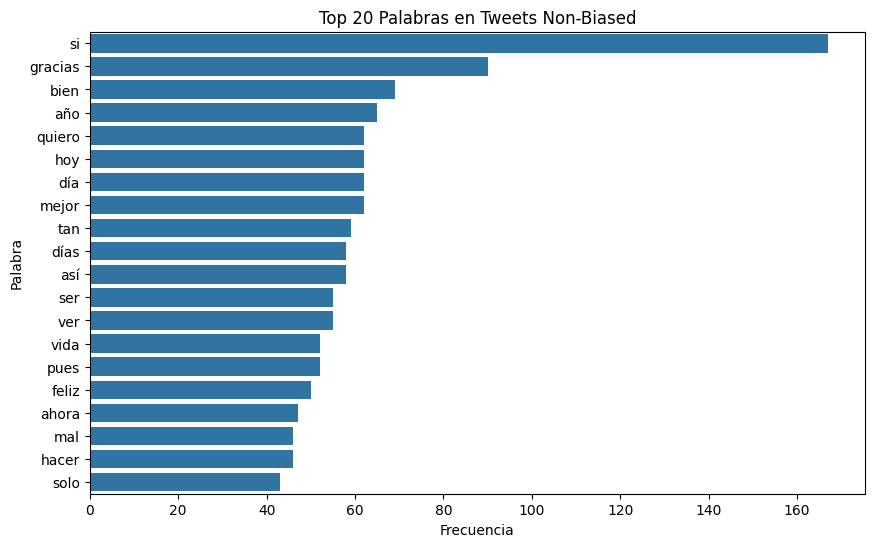

In [ ]:
from collections import Counter

biased_tweets = tweets[tweets['Label'] == 'biased']['texto_sin_stopwords']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['texto_sin_stopwords']

def obtener_frecuencia(serie_de_textos):
    todas_las_palabras = []
    for texto in serie_de_textos:
        if isinstance(texto, str):
            todas_las_palabras.extend(texto.split())
    return Counter(todas_las_palabras)

frecuencia_biased = obtener_frecuencia(biased_tweets)
frecuencia_non_biased = obtener_frecuencia(non_biased_tweets)

print("\nPalabras más comunes en tweets 'biased':", frecuencia_biased.most_common(20))
print("Palabras más comunes en tweets 'non-biased':", frecuencia_non_biased.most_common(20))

def graficar_frecuencia(frecuencia, titulo, n=20):
    palabras = [item[0] for item in frecuencia.most_common(n)]
    counts = [item[1] for item in frecuencia.most_common(n)]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=palabras)
    plt.title(titulo)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

graficar_frecuencia(frecuencia_biased, 'Top 20 Palabras en Tweets Biased')
graficar_frecuencia(frecuencia_non_biased, 'Top 20 Palabras en Tweets Non-Biased')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

Los twees con la etiqueta 'biased' usan mucho estas palabras: 'si', 'mujer', 'mujeres', 'ser', 'así', 'gracias', 'mejor', 'mamá', 'tan', 'solo', 'cosas', 'niñas', 'casa', 'sé', 'chicas', 'hombres', 'puta', 'ahora', 'mal'.

Que salgan mucho 'mujer', 'mujeres' y 'niñas' puede significar que los tweets hablan sobre temas de género.

Usar 'mejor' o 'peor' puede servir para dar opiniones buenas o malas.

Las empresas pueden usar esto para entender mejor las opiniones 'biased' para: ver qué temas son delicados, encontrar pronto el lenguaje malo, entender por qué las opiniones son 'biased' y decidir cómo comunicarse.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                 texto_sin_stopwords  sentimiento
0  cabrón tí reciben noticias colchoncito puro ch...          0.0
1  alguien tan amable ir hacerme compra mañana ba...          0.0
2          hahaha si rico nadamas falta presentación          0.2
3  ves programa favorito sólo encuentro temporada...          0.0
4                siempre tortilla triunfa mas platos          0.0


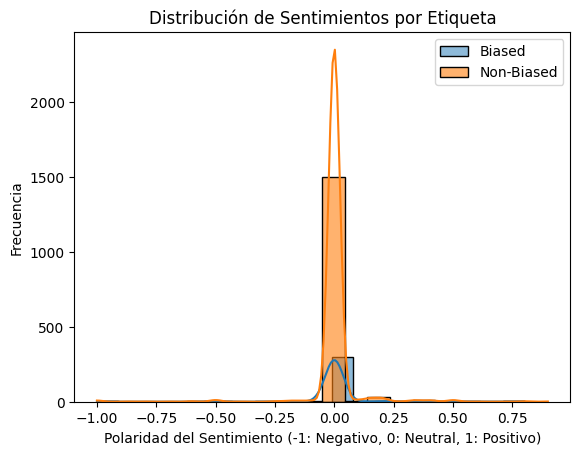


Media del sentimiento para tweets 'biased': 5.2410901467505753e-05
Media del sentimiento para tweets 'non-biased': 0.002609730495068841


In [ ]:
try:
    from textblob import TextBlob
except ImportError:
    !pip install textblob
    from textblob import TextBlob
    import nltk
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('sentiment/vader_lexicon.zip/vader_lexicon.txt')
except LookupError:
    nltk.download('vader_lexicon')
try:
    nltk.data.find('tokenizers/punkt/PY3/english.pickle')
except LookupError:
    nltk.download('punkt')

def obtener_sentimiento(texto):
    if isinstance(texto, str):
        analysis = TextBlob(texto)
        return analysis.sentiment.polarity
    return None

tweets['sentimiento'] = tweets['texto_sin_stopwords'].apply(obtener_sentimiento)

print(tweets[['texto_sin_stopwords', 'sentimiento']].head())

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tweets[tweets['Label'] == 'biased']['sentimiento'], bins=20, kde=True, label='Biased')
sns.histplot(tweets[tweets['Label'] == 'non-biased']['sentimiento'], bins=20, kde=True, alpha=0.6, label='Non-Biased')
plt.title('Distribución de Sentimientos por Etiqueta')
plt.xlabel('Polaridad del Sentimiento (-1: Negativo, 0: Neutral, 1: Positivo)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


print("\nMedia del sentimiento para tweets 'biased':", tweets[tweets['Label'] == 'biased']['sentimiento'].mean())
print("Media del sentimiento para tweets 'non-biased':", tweets[tweets['Label'] == 'non-biased']['sentimiento'].mean())

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Los tweets 'biased' y 'non-biased' se sienten diferente. Los 'biased' tienen sentimientos más variados, desde muy buenos hasta muy malos. Los 'non-biased' casi siempre son neutrales.

Esto quiere decir que los 'biased' expresan opiniones o emociones fuertes. No son neutrales, sino que dan valoraciones, critican o apoyan mucho algo. A veces, el 'biased' viene de sentimientos negativos.

Los tweets 'non-biased' casi siempre son neutrales, como si solo informaran sin meter emociones.

Ver cómo se sienten los tweets ayuda a saber qué piensa la gente y a las empresas a tomar mejores decisiones y responder mejor a lo que opina el público.








## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

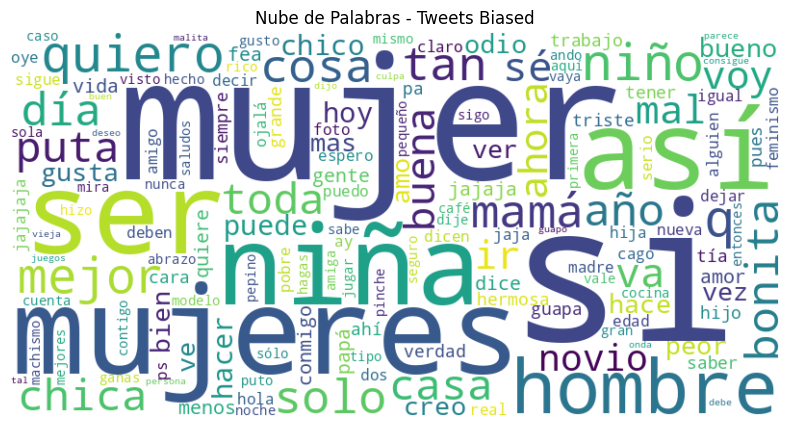

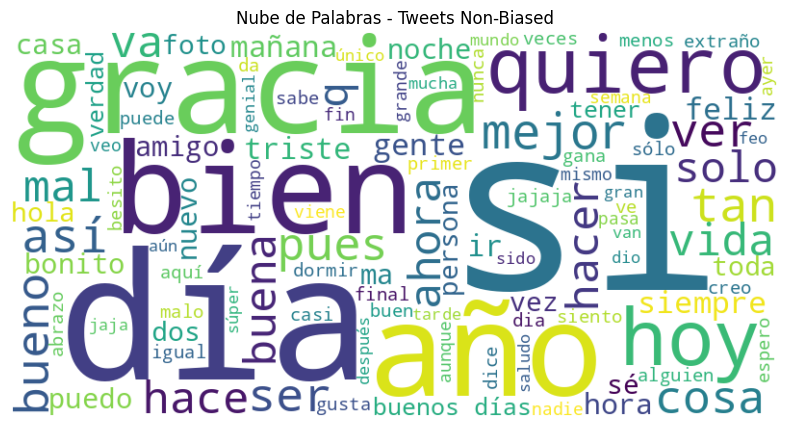

In [ ]:

try:
    from wordcloud import WordCloud, STOPWORDS
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

def generar_nube_palabras(textos, titulo):
    if isinstance(textos, pd.Series):
        text = ' '.join(textos.astype(str))
        wordcloud = WordCloud(width=800, height=400,
                              background_color='white',
                              stopwords=STOPWORDS.update(stop_words_es), # Añade tus stopwords en español
                              min_font_size=10).generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(titulo)
        plt.show()
    else:
        print(f"No se puede generar la nube de palabras para '{titulo}'. Se esperaba una Serie de Pandas.")

# Generar nubes de palabras para tweets 'biased' y 'non-biased'
generar_nube_palabras(biased_tweets, 'Nube de Palabras - Tweets Biased')
generar_nube_palabras(non_biased_tweets, 'Nube de Palabras - Tweets Non-Biased')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?